Analyze the performance of GPT-2 model you trained with exisitng GPT-2 model

Minimum train loss: 2.640002
Minimum val loss: 3.0748
Maximum HellaSwag performance: 0.3063


/tmp/ipykernel_6308/920463207.py:65: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0.0,4.0)


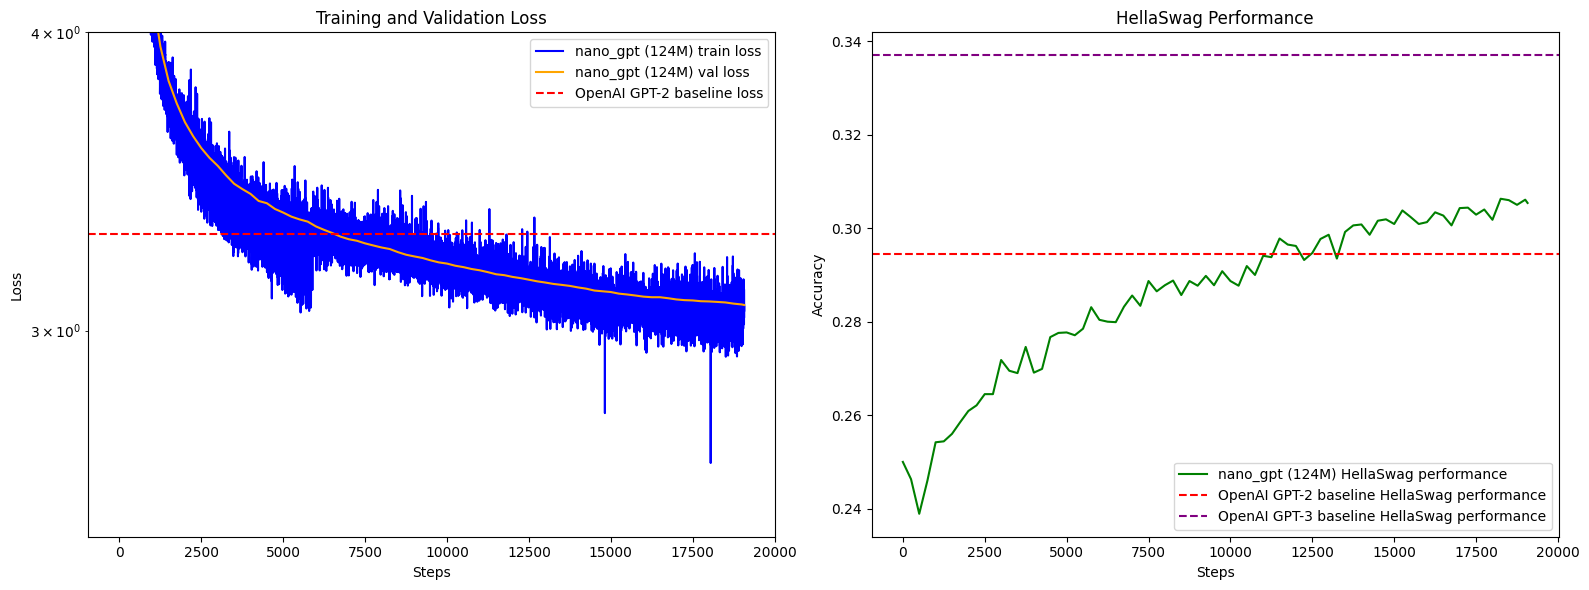

In [8]:
# parse and visualize the log file of a simulation run

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]

hellsaswag_gpt2_baseline = {
    # performance on HellaSwag with GPT-2 models
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431926,
    "1558M": 0.488946,
}[sz]

hellsaswag_gpt3_baseline = {
    # performance on HellaSwag with GPT-3 models
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file
with open('gpt2_model_performance/gpt2-full-training.txt','r') as f:
    lines = f.readlines()

# parse the lines, group by stream (train, val, hellaswag)

streams = {}
for line in lines:
    _, step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)
streams_xy = {}
for stream, data in streams.items():
    steps = sorted(data.keys())
    values = [data[step] for step in steps]
    streams_xy[stream] = (steps, values)

    
plt.figure(figsize=(16, 6))
# plot the losses, train and validation
plt.subplot(1, 2, 1)
xs, ys = streams_xy["train"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"nano_gpt ({sz}) train loss", color="blue")
print("Minimum train loss:", ys.min())
xs, ys = streams_xy["val"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"nano_gpt ({sz}) val loss", color="orange")
print("Minimum val loss:", ys.min())
if loss_baseline is not None:
    plt.axhline(loss_baseline, color="red", linestyle="--", label="OpenAI GPT-2 baseline loss")

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.ylim(0.0,4.0)
plt.title("Training and Validation Loss")
plt.legend()

# plot the HellaSwag performance panel 2
plt.subplot(1, 2, 2)
xs, ys = streams_xy["hellaswag"]
ys = np.array(ys)
plt.plot(xs, ys, label=f"nano_gpt ({sz}) HellaSwag performance", color="green")
if hellsaswag_gpt2_baseline is not None:
    plt.axhline(hellsaswag_gpt2_baseline, color="red", linestyle="--", label="OpenAI GPT-2 baseline HellaSwag performance")
if hellsaswag_gpt3_baseline is not None:
    plt.axhline(hellsaswag_gpt3_baseline, color="purple", linestyle="--", label="OpenAI GPT-3 baseline HellaSwag performance")

plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.title("HellaSwag Performance")
plt.legend()
print("Maximum HellaSwag performance:", ys.max())
plt.tight_layout()
plt.savefig("gpt2_model_performance/gpt2-full-training.png", dpi=300)
plt.show()

OpenAI model was trained on 100B tokens, this was trained on 10B token. But this data is not the same data OpenAI used. Dataset distribution is different.
Also FineWEB dataset can contain contents of HellaSwag. In that case, our validation loss is basically training loss. Multi epoch run can make this model perform even better.